In [1]:
# # Data Preprocessing
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load  data from Local drive
from google.colab import files
uploaded = files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [3]:
# Importing the dataset
dataset = pd.read_csv('Salary_Data.csv')
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
# Description of data
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
dataset.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
#Print Information about data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


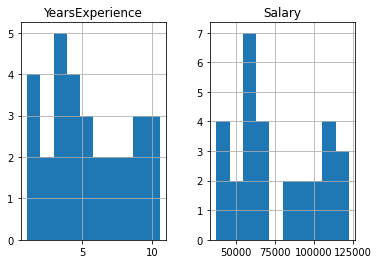

In [ ]:
# Data visualization
from matplotlib import pyplot
dataset.hist()
pyplot.show()

this graph show the relation of how many workers of having expriance 

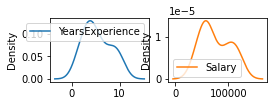

In [ ]:
# Data visualization
dataset.plot(kind='density' ,subplots=True, layout=(3,3), sharex=False)
pyplot.show()

In [4]:
# Extracting dependent and independent variables:
# Extracting independent variable:
X = dataset.iloc[:, 0:1].values
# Extracting dependent variable:
y = dataset.iloc[:, 1].values

In [ ]:
X  # x is a 2d array

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split           # train_test_split  >    module     

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [ ]:
X_train

array([[ 2.9],
       [ 5.1],
       [ 3.2],
       [ 4.5],
       [ 8.2],
       [ 6.8],
       [ 1.3],
       [10.5],
       [ 3. ],
       [ 2.2],
       [ 5.9],
       [ 6. ],
       [ 3.7],
       [ 3.2],
       [ 9. ],
       [ 2. ],
       [ 1.1],
       [ 7.1],
       [ 4.9],
       [ 4. ]])

In [6]:
from sklearn.linear_model import LinearRegression
# Fitting Simple Linear Regression to the Training set

In [7]:
regression=LinearRegression()
regression.fit(X_train ,y_train)

LinearRegression()

In [8]:
y_pred = regression.predict(X_test)
print(y_pred)

[ 40835.10590871 123079.39940819  65134.55626083  63265.36777221
 115602.64545369 108125.8914992  116537.23969801  64199.96201652
  76349.68719258 100649.1375447 ]


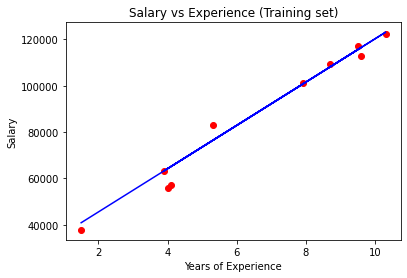

In [9]:
# Visualising the Training set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, y_pred, color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

this graph is showing the linear regression value to which its predicts the salary on the basic of expreance


In [ ]:
print("Regression sop %2f" %(regression.coef_[0]))
print("REgission intersection %2f"  %(regression.intercept_))

Regression sop 9345.942443
REgission intersection 26816.192244


In [ ]:
year_of_exprence=6
print("salar on the basic of exprience is %2f" %(regression.predict([[year_of_exprence]])))

salar on the basic of exprience is 82891.846903


In [ ]:
from sklearn import metrics
print('%2f' %(metrics.mean_absolute_error(y_test,y_pred)))

3426.426937


In [ ]:
exp1 = 0
print("%f " %(regression.score(X_train,y_train)))
print("%f " %(regression.score(X_test,y_test)))
print("underfitting")

0.938190 
0.974915 
underfitting


In [15]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
import pickle
saved_model= pickle.dump(regression,open('/content/drive/My Drive/intership_2022/ml/linearregression1.pkl', 'wb'))

In [20]:
import joblib
filename = '/content/drive/My Drive/intership_2022/ml/linear.sav'
joblib.dump(regression, filename)
 
# some time later...
 
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.9749154407708353


In [21]:
a = 0 #@param {type:"number"}


output= loaded_model.predict([[a]])
print("Salary for given exp:", output)


Salary for given exp: [26816.19224403]


In [22]:
!pip install flask-ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
%mkdir templates -p

In [40]:
%%writefile templates/index.html
<!DOCTYPE html>
<html >

<head>
<title>Machine Learning  Linear Regression Deployment</title>
<meta charset="UTF-8">
<link href='https://fonts.googleapis.com/css?family=Open+Sans+Condensed:300' rel='stylesheet' type='text/css'>
<!-- JavaScript Bundle with Popper -->
<script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.0/dist/js/bootstrap.bundle.min.js" integrity="sha384-A3rJD856KowSb7dwlZdYEkO39Gagi7vIsF0jrRAoQmDKKtQBHUuLZ9AsSv4jD4Xa" crossorigin="anonymous"></script>
<link href="https://cdn.jsdelivr.net/npm/bootstrap@5.0.0-beta1/dist/css/bootstrap.min.css" rel="stylesheet" integrity="sha384-giJF6kkoqNQ00vy+HMDP7azOuL0xtbfIcaT9wjKHr8RbDVddVHyTfAAsrekwKmP1" crossorigin="anonymous"> 
<style>

h1 {text-align: center;}
h2 {text-align: center;}
h3 {text-align: center;}
p {text-align: center;}
div {text-align: center;}
</style>
</head>
<body>
      
<div class="" style="background-color:	#9370DB;" >
<div class="clearfix">
           
<div class="col-md-12">
<center><h2 style="font-size:50px;color:black;margin-top:10px;">Poornima Institute of Engineering & Technology</h2></center> 
<center><h2 style="font-size:45px;color:black;margin-top:10px;">Department of Computer Engineering</></center> 
<center><h2 style="font-size:40px;color:black;margin-top:10px;">Machine learning and Data Science </></center>
<center><h2 style="font-size:35px;color:black;margin-top:10px;">Predict Salary on the basis Experiance</></center> 

</div>
<div class="login">

<!-- Main Input For Receiving Query to our ML -->
<form action="{{ url_for('pr')}}"method="get">  
<div class="form-floating mb-3">
<br>
<br>

<input type="number" class="form-control" id="exp" name="exp" step="any" min="0" max="100" placeholder="0" required="required">
<label for="floatingInput"><h6>Enter experince in years</h6></label>
</div>
<br>
<br>

<button type="submit" class="btn btn-primary btn-block btn-large">Predict salary for Given Experinace is </button>
</form>
<br>
<br>
<br>

{{ prediction_text }}
</div>

<div class="" style="background-color:blue;" >
<div class="clearfix">
           
<div class="col-md-12">
 <center><p style="font-size:25px;color:white;margin-top:20px;">Experiment Performed in Summer internship 2022 from 27 June to 8 August </p></center> 
</div>
</div>
</div>
</body>
</html>

Overwriting templates/index.html


In [25]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 745 kB 13.3 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19007 sha256=955729d9cbe541de17ec74c7d7f0c4412021c755fcf76a403f9c98859eaabf6f
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
Successfully built pyngrok


In [26]:
!ngrok authtoken 2CUIKzhhbsoHHk6GUeiens9G5T9_7weiPkL9r6htxRL9UMwZH   

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [41]:
import numpy as np
from flask import Flask, request, jsonify, render_template
from flask_ngrok import run_with_ngrok
import pickle


app = Flask(__name__)
model = pickle.load(open('/content/drive/My Drive/intership_2022/ml/linearregression.pkl','rb')) 
run_with_ngrok(app)

@app.route('/')
def home():
      return render_template("index.html")
  
@app.route('/pr',methods=['GET'])
def pr():
  exp = float(request.args.get('exp'))
  prediction = model.predict([[exp]])
  return render_template('index.html', prediction_text='Regression Model  has predicted salary for given experinace is : {}'.format(prediction))


app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://cedf-34-86-222-38.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [26/Jul/2022 15:16:27] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [26/Jul/2022 15:16:28] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [26/Jul/2022 15:16:30] "GET /pr?exp=6 HTTP/1.1" 200 -
